Premier League Data Analyser by Evie Marginson- 469104

In [ ]:
# This script appends new data to an existing Excel file containing football club stats for Luton from the 23/24 Premier league season.

# Import libraries
import pandas as pd
import os

os.path.relpath(
    r"C:/Users/eviem/OneDrive/Documents/Uni/Module 2- Digital Maths and Programming/Uni-Assignment/Uni-Assignment/Evie Marginson- 469104- Premier League Data Analyser",
    start=os.getcwd()
)


#Change the current working directory to the script's directory
new_dir = os.chdir(r"c:\Users\eviem\OneDrive\Documents\Uni\Module 2- Digital Maths and Programming\Uni-Assignment\Uni-Assignment\Evie Marginson- 469104- Premier League Data Analyser")

# Current working directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

#Define the path to the 'data' folder
data_folder = os.path.join(current_dir, "Data")

# Existing Excel file
file_path = os.path.join(data_folder, "Luton Stats.xlsx")

# New data to append
new_data = pd.DataFrame({
    'Season': ['23/24'],
    'Team': ['Luton'],
    'Table Position': [18],
    'Points': [26],
    'Matches Played': [38],
    'Wins': [6],
    'Losses': [24],
    'Draws': [8],
    'Goals For': [52],
    'Goals Against': [85],
    'Goal Difference': [-33],
    'Top Scorer': ['Carlton Morris'],
    'Red Cards': [0],
    'Yellow Cards': [71]})

# Read the existing Excel file
df_existing = pd.read_excel(file_path)

# Append the new data to the existing DataFrame
df_new = pd.DataFrame(new_data)
df_combined = pd.concat([df_existing, df_new], ignore_index=True)

# Write the updated DataFrame back to the Excel file
df_combined.to_excel(file_path, index=False)

Current working directory: /workspaces/Uni-Assignment


FileNotFoundError: [Errno 2] No such file or directory: '/workspaces/Uni-Assignment/Data/Luton Stats.xlsx'

In [12]:
# This script combines existing Excel files into a single Excel file containing data for different football clubs for the 23/24 and 24/25 Premier league seasons.

# Import libraries
import pandas as pd
import os

#Get the current working directory
current_dir = os.getcwd()

#Define the path to the 'data' folder
data_folder = os.path.join(current_dir, "Data")
file_path_combined = os.path.join(data_folder, "Combined Football Club Stats.xlsx")

# List of file paths for the football club stats
def main():
# List of team names
 team_names = [
    "Arsenal", "Aston Villa", "Bournemouth", "Brentford", "Brighton", "Burnley",
    "Chelsea", "Crystal Palace", "Everton", "Fulham", "Ipswich", "Leicester",
    "Liverpool", "Luton", "Manchester City", "Manchester United", "Newcastle",
    "Nottingham", "Sheffield United", "Southampton", "Tottenham", "West Ham", "Wolverhampton"
    ]
 # Automatically generate the file paths using os.path.join
 file_paths = [os.path.join(data_folder, f"{team} Stats.xlsx") for team in team_names] 

 # Combine the data
 combined_df = pd.DataFrame()
 for path, team in zip(file_paths, team_names):
   if os.path.exists(path):
       df = pd.read_excel(path)
       combined_df = pd.concat([combined_df, df], ignore_index=True)

 # Drop rows with missing values (if needed)
 combined_df.dropna(inplace=True)

 # Save the combined dataframe to an Excel file
 output_path = os.path.join(data_folder, "Combined Football Club Stats.xlsx")
 combined_df.to_excel(output_path, index=False)
 
# Main function to execute the script
if __name__ == "__main__":
   main()

Welcome to the Premier League Data Analyser!
------------------------------
Main Menu
Options:
1. View team stats
2. View league standings
3. View graphs
4. Exit the Premier League Data Analyser
------------------------------
Welcome to the Team Stats Viewer!
You can view stats for any Premier League team from the 23/24 and 24/25 seasons.
------------------------------
Please enter the team name you want to view stats for.
------------------------------
You entered: Ipswich
------------------------------
Which season do you want to view stats for Ipswich?
Options:
1. All seasons available on Premier League Data Analyser
2. 24/25
3. 23/24
4. Return to Team Stats Viewer
5. Return to Main Menu
------------------------------
No data for Ipswich in the 23/24 season.
------------------------------
Navigation Options:
1. Return to Team Stats Viewer
2. Return to Season Selection for Ipswich
3. Return to Main Menu
4. Exit the Premier League Data Analyser
------------------------------
Returning

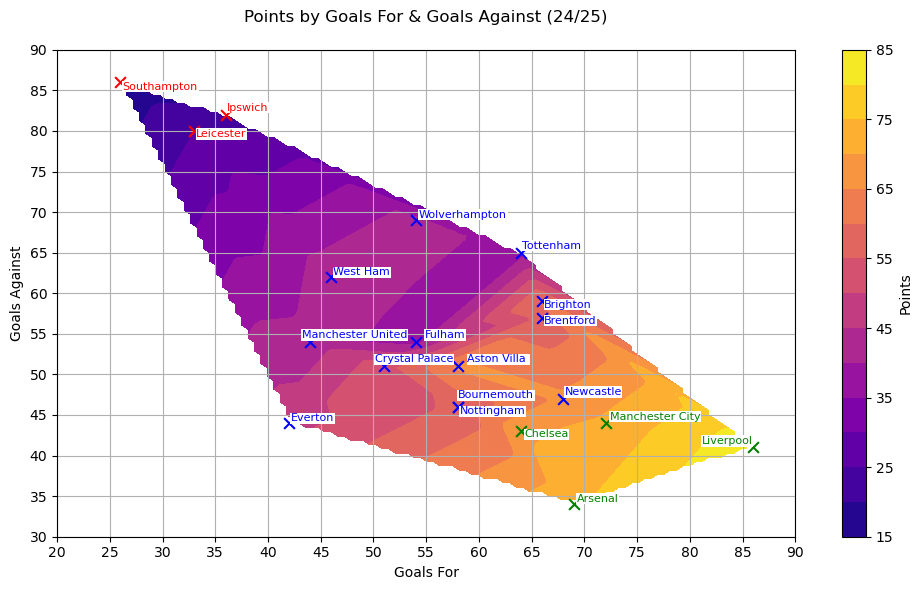

------------------------------
Navigation Options:
1. Return to Graphs Viewer
2. Return to Graph Season Selection
3. Return to Main Menu
4. Exit the Premier League Data Analyser
------------------------------
Exiting the Premier League Data Analyser. Goodbye!


In [15]:
# This script is a user interface for viewing football club stats, league standings and graphs.

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from colorama import Fore, Style
from tabulate import tabulate
import sys
import os 
import numpy as np
from scipy.interpolate import griddata
from adjustText import adjust_text

# Define a divider function for better readability
def divider():
    print("-" * 30)

# Define a function to print headers with a divider
def print_header(text):
    divider()
    print(Fore.RED + text + Fore.RESET)
    divider()

# Load the Combined Football Stats Excel file
#Get the current working directory
current_dir = os.getcwd()

#Define the path to the 'data' folder
data_folder = os.path.join(current_dir, "Data")
file_path_combined = os.path.join(data_folder, "Combined Football Club Stats.xlsx")
try:
   data = pd.read_excel(file_path_combined)
except Exception as e:
   print(Fore.RED + f"Error loading Excel file: {e}" + Fore.RESET)
   sys.exit(1)

# List of valid team names
valid_teams = [
   "Arsenal", "Aston Villa", "Bournemouth", "Brentford", "Brighton", "Burnley", "Chelsea", "Crystal Palace",
   "Everton", "Fulham", "Ipswich", "Leicester", "Liverpool", "Luton", "Manchester City", "Manchester United",
   "Newcastle", "Nottingham", "Sheffield United", "Southampton", "Tottenham", "West Ham", "Wolverhampton"
]

# Navigation options for team stats viewer and season selection
def navigation_options_team_stats(team_name):
   divider()
   print("Navigation Options:")
   print("1. Return to Team Stats Viewer")
   print(f"2. Return to Season Selection for {Fore.RED}{team_name}{Fore.RESET}")
   print("3. Return to Main Menu")
   print("4. Exit the Premier League Data Analyser")
   navigation_input = input("Enter your choice (1/2/3/4): ").strip()
 
   if navigation_input == "1":
       divider()
       print(Fore.RED + "Returning to Team Stats Viewer..." + Fore.RESET)
       team_stats_viewer()
   elif navigation_input == "2":
       print_header(f"Returning to Season Selection for {team_name}...")
       team_stats_season_viewer(team_name)
   elif navigation_input == "3":
       print_header("Returning to Main Menu...")
       return
   elif navigation_input == "4":
       divider()
       print(Fore.RED + "Exiting the Premier League Data Analyser. Goodbye!" + Fore.RESET)
       sys.exit()
   else:
       divider()
       print(Fore.RED + "Invalid choice. Please try again." + Fore.RESET)
       navigation_options_team_stats(team_name)
   
# Define a function to display the team stats season viewer
def team_stats_season_viewer(team_name):
   # Display the season selection menu      
   print(f"Which season do you want to view stats for {Fore.RED}{team_name}{Fore.RESET}?")
   print("Options:")
   print("1. All seasons available on Premier League Data Analyser")
   print("2. 24/25")
   print("3. 23/24")
   print("4. Return to Team Stats Viewer")
   print("5. Return to Main Menu")
   divider()
   season_choice = input("Enter your choice (1/2/3/4/5): ").strip()

   def handle_season_display_stats(season_label, filter_seasons):
       filtered_data = data[(data['Team'] == team_name) & (data['Season'].isin(filter_seasons))]
       if filtered_data.empty:
           if len(filter_seasons) == 1:
               print(Fore.RED + f"No data for {team_name} in the {filter_seasons[0]} season." + Fore.RESET)
               navigation_options_team_stats(team_name)
           else:
               print(Fore.RED + f"No data for {team_name} in the selected seasons." + Fore.RESET)
               navigation_options_team_stats(team_name) 
       else:
           print(Fore.RED + f"Loading stats for {team_name} {season_label}..." + Fore.RESET)
           divider()
           filtered_data = filtered_data.reset_index(drop=True)
           print(tabulate(filtered_data, headers='keys', tablefmt='grid', showindex=False))
           navigation_options_team_stats(team_name)
                    
   # Handle season choice
   if season_choice == "1":
       handle_season_display_stats("All Seasons", ['23/24', '24/25'])  
   elif season_choice == "2":
       handle_season_display_stats("24/25 Season", ['24/25'])
   elif season_choice == "3":
       handle_season_display_stats("23/24 Season", ['23/24'])
   elif season_choice == "4":
       divider()
       print(Fore.RED + "Returning to Team Stats Viewer..." + Fore.RESET)
       team_stats_viewer()
   elif season_choice == "5":
       divider()
       print(Fore.RED + "Returning to Main Menu..." + Fore.RESET)
       return
   else:
       divider()
       print("Invalid choice. Please try again.")
       team_stats_season_viewer(team_name)
   
# Team Stats Viewer
def team_stats_viewer():
   divider()
   print("Welcome to the Team Stats Viewer!")
   print("You can view stats for any Premier League team from the 23/24 and 24/25 seasons.")
   divider()
   print("Please enter the team name you want to view stats for.")
   team_name = input("Enter the team name: ").strip()

   # Check if the entered team name is valid
   if team_name in valid_teams:
       divider()
       print(f"You entered: {Fore.RED}{team_name}{Fore.RESET}")
       divider()
       team_stats_season_viewer(team_name) 
   # If the entered team name is not valid
   else:
       divider()
       print(f"Sorry, the Premier League Football Analyser does not have any data for {Fore.RED}{team_name}{Fore.RESET}. Please try again.")
       divider()

       # Define a function to show valid team names
       def valid_team_name_options_stats():
           print("Do you want to see a list of the valid team names?")
           print("Options:")
           print("1. Yes")
           print("2. No")
           show_valid_teams = input("Enter your choice (1/2): ").strip()

           if show_valid_teams == "1":
               print_header("You chose Yes.")
               print(Fore.RED + "Valid Team Names:" + Fore.RESET)
               for valid_team in valid_teams:
                   print(f"- {valid_team}")
               divider()
               print(Fore.RED + "Returning to Team Stats Viewer..." + Fore.RESET)
               return team_stats_viewer()
           elif show_valid_teams == "2":
               print_header("You chose No.")
               print(Fore.RED + "Returning to Team Stats Viewer..." + Fore.RESET)
               return team_stats_viewer()
           else:
               print_header("Invalid choice. Please try again.")
               return valid_team_name_options_stats()
               
       valid_team_name_options_stats()

# Navigation options for league standings viewer
def navigation_options_league_standings():
   divider()
   print("Navigation Options:")
   print("1. Return to League Standings Viewer")
   print("2. Return to Main Menu")
   print("3. Exit the Premier League Data Analyser")
   navigation_input = input("Enter your choice (1/2/3): ").strip()

   if navigation_input == "1":
       divider()
       print(Fore.RED + "Returning to League Standings Viewer ..." + Fore.RESET)
       return league_standing_viewer()
   elif navigation_input == "2":
       print_header("Returning to Main Menu...")
       return
   elif navigation_input == "3":
       divider()
       print(Fore.RED + "Exiting the Premier League Data Analyser. Goodbye!" + Fore.RESET)
       sys.exit()
   else:
       divider()
       print(Fore.RED + "Invalid choice. Please try again." + Fore.RESET)
       return navigation_options_league_standings()

# League Standings Viewer
def league_standing_viewer():
   divider()
   print(Fore.RED + "Welcome to the League Standings Viewer!" + Fore.RESET)
   print("You can view the League Standings for the Premier League 23/24 and 24/25 seasons.")
   divider()
   print("Which season do you want to view the League Standings for?")
   print("Options:") 
   print("1. 24/25")
   print("2. 23/24")
   print("3. Return to Main Menu")
   season_choice = input("Enter your choice (1/2/3): ").strip()

   if season_choice == "1":
       divider()
       print(Fore.RED + "You chose the 24/25 season." + Fore.RESET)
       season = '24/25'  
   elif season_choice == "2":
       divider()
       print(Fore.RED + "You chose the 23/24 season." + Fore.RESET)
       season = '23/24'
   elif season_choice == "3":
       print_header("Returning to Main Menu...")
       return
   else:
       divider()
       print(Fore.RED + "Invalid choice. Please try again." + Fore.RESET)
       return league_standing_viewer()
   
   divider()
   print(Fore.RED + f"Premier League Standings - {season} Season" + Fore.RESET)

   # Filter for selected season
   standings = data[data['Season'] == season]

   # Sort standings by Points, Goal Difference, then Goals For
   sorted_standings = standings.sort_values(
       by=['Points', 'Goal Difference', 'Goals For'],
       ascending=[False, False, False]
   ).reset_index(drop=True)
 
   # Insert Position column (1st to 20th)
   sorted_standings.insert(0, 'Position', range(1, len(sorted_standings) + 1))
 
   # Columns to display
   columns_to_display = ['Position', 'Team', 'Points', 'Matches Played', 'Wins', 'Losses', 'Draws',
                         'Goals For', 'Goals Against', 'Goal Difference']
   
   # Colour team names based on table position
   n = len(sorted_standings)
   colour_team_name = lambda i, t: (
       Fore.GREEN + t + Style.RESET_ALL if i < 4 else
       Fore.RED + t + Style.RESET_ALL if i >= n - 3 else
       t
   )

    # Apply colouring to team names
   display_table = sorted_standings.copy()
   display_table['Team'] = [colour_team_name(i, team) for i, team in enumerate(display_table['Team'])]

   # Print the league table
   print(tabulate(display_table[columns_to_display], headers='keys', tablefmt='grid', showindex=False))

   navigation_options_league_standings()

# Graphs Viewer Navigation Options
def navigation_options_graphs_viewer(graph_choice):
    divider()
    print("Navigation Options:")
    print("1. Return to Graphs Viewer")
    print("2. Return to Graph Season Selection")
    print("3. Return to Main Menu")
    print("4. Exit the Premier League Data Analyser")
    navigation_input = input("Enter your choice (1/2/3/4): ").strip()

    if navigation_input == "1":
        divider()
        print(Fore.RED + "Returning to Graphs Viewer..." + Fore.RESET)
        return graphs_viewer()
    elif navigation_input == "2":
        divider()
        print(Fore.RED + "Returning to Graph Season Selection..." + Fore.RESET)
        return graph_season_selection(graph_choice)
    elif navigation_input == "3":
        divider()
        print(Fore.RED + "Returning to Main Menu..." + Fore.RESET)
        return
    elif navigation_input == "4":
        divider()
        print(Fore.RED + "Exiting the Premier League Data Analyser. Goodbye!" + Fore.RESET)
        sys.exit()
    else:
        divider()
        print(Fore.RED + "Invalid choice. Please try again." + Fore.RESET)
        return navigation_options_graphs_viewer(graph_choice)

# Graph season selection
def graph_season_selection(graph_choice):
    divider()
    print("Which season do you want to view the graph for?")
    print("Options:")
    print("1. 24/25")
    print("2. 23/24")
    print("3. Return to Graphs Viewer")
    print("4. Return to Main Menu")
    season_choice = input("Enter your choice (1/2/3/4): ").strip()

    if season_choice == "1":
        divider()
        print(Fore.RED + f"You chose the 24/25 season..." + Fore.RESET)
        season = '24/25'
    elif season_choice == "2":
        divider()
        print(Fore.RED + f"You chose the 23/24 season for..." + Fore.RESET)
        season = '23/24'
    elif season_choice == "3":
        divider()
        print(Fore.RED + "Returning to Graphs Viewer..." + Fore.RESET)
        return graphs_viewer()
    elif season_choice == "4":
        divider()
        print(Fore.RED + "Returning to Main Menu..." + Fore.RESET)
        return
    else:
        divider()
        print(Fore.RED + "Invalid choice. Please try again." + Fore.RESET)
        return graph_season_selection(graph_choice)

    # Filter for selected season
    graphs = data[data['Season'] == season]

    # Display the selected graph based on user choice
    if graph_choice == "1":
        divider()
        print(Fore.RED + f"Displaying Yellow and Red Cards Bar Chart for the {season} season." + Fore.RESET)
        teams = graphs['Team']
        yellow_cards = graphs['Yellow Cards']
        red_cards = graphs['Red Cards']
        x = np.arange(len(teams))  # numeric positions for each team
        plt.figure(figsize=(12, 6))
        plt.bar(x, yellow_cards, color='yellow', label='Yellow Cards')
        plt.bar(x, red_cards, color='red', label='Red Cards', bottom=yellow_cards)
        plt.xlabel('Teams')
        plt.ylabel('Number of Cards')
        plt.title(f"Yellow and Red Cards in {season} Season")
        plt.xticks(x, teams, rotation=45, ha='right')
        plt.tick_params(axis='x', pad=2) 
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
        max_cards = (graphs['Yellow Cards'] + graphs['Red Cards']).max()
        plt.yticks(range(0, int(max_cards) + 5, 5))
        plt.tight_layout()
        plt.show()

    elif graph_choice == "2":
        def team_selection_pie_chart():
            divider()
            print("Please enter the team name you want to view the Wins, Losses, and Draws Pie Chart for.")
            team_name = input("Enter the team name: ").strip()

            # If the entered team name is valid
            if team_name in valid_teams:
                divider()
                print(f"You entered: {Fore.RED}{team_name}{Fore.RESET}")
                # Check if the team has data for the selected season
                if not graphs[graphs['Team'] == team_name].empty:
                    divider()
                    print(Fore.RED + f"Displaying {team_name} Wins, Losses, and Draws Pie Chart for the {season} season." + Fore.RESET)
                else:
                    divider()
                    print(Fore.RED + f"No data available for {team_name} in the {season} season." + Fore.RESET)
                    navigation_options_graphs_viewer(graph_choice)
                # Filter for the selected team
                team_data = graphs[graphs['Team'] == team_name]
                # Prepare data for the pie chart
                wins = team_data['Wins'].values[0]
                losses = team_data['Losses'].values[0]
                draws = team_data['Draws'].values[0]
                labels = ['Wins', 'Losses', 'Draws']
                sizes = [wins, losses, draws]
                colors = ['green', 'red', 'orange']
                explode = (0, 0, 0)
                # Create the pie chart
                plt.figure(figsize=(8, 8))
                plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
                        startangle=140)
                plt.title(f"{team_name} - Wins, Losses, and Draws in {season} Season", y=1.05)
                plt.axis('equal')
                plt.tight_layout()
                plt.show()
                navigation_options_graphs_viewer(graph_choice)
            # If the entered team name is not valid
            else:
                divider()
                print(f"Sorry, the Premier League Football Analyser does not have any data for {Fore.RED}{team_name}{Fore.RESET}. Please try again.")
                divider()

                # Define a function to show valid team names
                def valid_team_name_options_pie_chart():
                    print("Do you want to see a list of the valid team names?")
                    print("Options:")
                    print("1. Yes")
                    print("2. No")
                    show_valid_teams = input("Enter your choice (1/2): ").strip()

                    if show_valid_teams == "1":
                        print_header("You chose Yes.")
                        print(Fore.RED + "Valid Team Names:" + Fore.RESET)
                        for valid_team in valid_teams:
                            print(f"- {valid_team}")
                        divider()
                        print(Fore.RED + f"Returning to Team Selection for  Wins, Losses, and Draws Pie Chart in {season} Season  ..." + Fore.RESET)
                        return team_selection_pie_chart()
                    elif show_valid_teams == "2":
                        print_header("You chose No.")
                        print(Fore.RED + f"Returning to Team Selection for  Wins, Losses, and Draws Pie Chart in {season} Season  ..." + Fore.RESET)
                        return team_selection_pie_chart()
                    else:
                        print_header("Invalid choice. Please try again.")
                        return valid_team_name_options_pie_chart()

                valid_team_name_options_pie_chart()
        team_selection_pie_chart()
 
    elif graph_choice == "3":
        divider()
        print(Fore.RED + f"Displaying Wins against Yellow Cards Scatter Plot for the {season} season." + Fore.RESET)
        # Sort to get top 4 and bottom 3 teams by Points
        top_4_teams = graphs.sort_values(by='Points', ascending=False).head(4)['Team'].tolist()
        bottom_3_teams = graphs.sort_values(by='Points', ascending=True).head(3)['Team'].tolist()
        plt.figure(figsize=(10, 6))
        # Plot each team with color-coded crosses
        texts = []  
        for i in range(len(graphs)):
            team = graphs.iloc[i]['Team']
            wins = graphs.iloc[i]['Wins']
            yellows = graphs.iloc[i]['Yellow Cards']
            # Set color based on top/bottom status
            if team in top_4_teams:
                color = 'green'
            elif team in bottom_3_teams:
                color = 'red'
            else:
                color = 'black'
            # Plot cross
            plt.scatter(wins, yellows, c=color, marker='x', label=team if team in top_4_teams + bottom_3_teams else "", s=50)
            # Annotate team name and add to texts list
            t = plt.text(wins + 0.2, yellows, team, fontsize=8, color=color)
            texts.append(t)  # 2. Add text to list
        # Adjust labels after plotting all points
        adjust_text(texts, only_move={'texts':'xy'}, expand_text=(1.05, 1.2), lim=200)
        plt.title(f"Wins against Yellow Cards in {season} Season", pad=20)
        plt.xlabel('Wins')
        plt.ylabel('Yellow Cards')
        plt.grid(True)
        # Apply dynamic padding to axes
        x = graphs['Wins']
        y = graphs['Yellow Cards']
        x_range = x.max() - x.min()
        y_range = y.max() - y.min()
        x_pad = x_range * 0.05
        y_pad = y_range * 0.05
        plt.xlim(x.min() - x_pad, x.max() + x_pad) 
        plt.ylim(y.min() - y_pad, y.max() + y_pad)
        # Create ticks every 2 units from min to max
        x_min, x_max = plt.xlim()
        y_min, y_max = plt.ylim()
        xticks = np.arange(start=np.floor(x_min), stop=np.ceil(x_max) + 1, step=2)
        yticks = np.arange(start=np.floor(y_min), stop=np.ceil(y_max) + 1, step=2)
        plt.xticks(xticks)
        plt.yticks(yticks)
        plt.tight_layout()
        plt.show()

    elif graph_choice == "4":
        divider()
        print(Fore.RED + f"Displaying Goal Difference against Points Contour Plot for the {season} season." + Fore.RESET)
        # Extract relevant columns
        x = graphs['Goals For']
        y = graphs['Goals Against']
        z = graphs['Points']
        teams = graphs['Team']
        # Create a grid over the data space
        xi = np.linspace(x.min(), x.max(), 100)
        yi = np.linspace(y.min(), y.max(), 100)
        xi, yi = np.meshgrid(xi, yi)
        # Interpolate Points onto the grid
        zi = griddata((x, y), z, (xi, yi), method='linear')
        # Sort teams by Points to find top 4 and bottom 3
        sorted_indices = z.argsort()[::-1]  # descending order
        top_4_indices = sorted_indices[:4]
        bottom_3_indices = sorted_indices[-3:]
        # Prepare colors: default blue, top 4 green, bottom 3 red
        colors = ['blue'] * len(teams)
        for i in top_4_indices:
            colors[i] = 'green'
        for i in bottom_3_indices:
            colors[i] = 'red'
        plt.figure(figsize=(10, 6))
        contour = plt.contourf(xi, yi, zi, levels=14, cmap='plasma')
        plt.colorbar(contour, label='Points')
        # Scatter points with colors
        texts = []
        for i, (gx, gy, team) in enumerate(zip(x, y, teams)):
            # Draw cross marker
            plt.scatter(gx, gy, color=colors[i], marker='x', s=60, zorder=3)
            # Calculate label position so it doesn't overlap with the point
            label_x = gx + 0.05 if colors[i] == 'green' else gx - 0.05
            label_y = gy + 0.05 if colors[i] == 'green' else gy - 0.05
            # Add text label with dynamic position
            texts.append(
                plt.text(
                    label_x, label_y, team, fontsize=8, color=colors[i],
                    bbox=dict(facecolor='white', edgecolor='none', pad=0.5), zorder=3
                )
            )
        # Adjust labels to avoid overlaps and keep inside plot
        adjust_text(
            texts,
            only_move={'points': 'y', 'texts': 'xy'},
            expand_text=(1.05, 1.2),
            force_text=0.5,
            lim=200
        )
        # Labels and title
        plt.title(f"Points by Goals For & Goals Against ({season})", pad=20)
        plt.xlabel('Goals For')
        plt.ylabel('Goals Against')
        plt.grid(True)
        # Calculate padding as 5% of the range
        x_range = x.max() - x.min()
        y_range = y.max() - y.min()
        x_pad = x_range * 0.05
        y_pad = y_range * 0.05
        # Apply dynamic padding to axes
        plt.xlim(x.min() - x_pad, x.max() + x_pad)
        plt.ylim(y.min() - y_pad, y.max() + y_pad)
        # Create ticks every 5 units from min to max
        x_min, x_max = plt.xlim()
        y_min, y_max = plt.ylim()
        xticks = np.arange(start=np.floor(x_min/5)*5, stop=np.ceil(x_max/5)*5 + 1, step=5)
        yticks = np.arange(start=np.floor(y_min/5)*5, stop=np.ceil(y_max/5)*5 + 1, step=5)
        plt.xticks(xticks)
        plt.yticks(yticks)
        plt.tight_layout()
        plt.show()

    else:
        divider()
        print(Fore.RED + "Invalid graph choice. Please try again." + Fore.RESET)
        return graph_season_selection(graph_choice)

    navigation_options_graphs_viewer(graph_choice)

# Graphs Viewer
def graphs_viewer():
   divider()
   print(Fore.RED + "Welcome to the Graphs Viewer!" + Fore.RESET)
   print("You can view various graphs related to the Premier League 23/24 and 24/25 season stats.")
   divider()
   print(f"Which graph do you want to view for?")
   print("Options:")
   print("1. Yellow and Red Cards- Bar Chart")
   print("2. Wins, Losses, and Draws- Pie Chart")
   print("3. Wins against Yellow Cards- Scatter Plot")
   print("4. Goal Difference against Points- Contour Plot")
   print("5. Return to Main Menu")
   graph_choice = input("Enter your choice (1/2/3/4/5): ").strip()

   if graph_choice == "1":
       divider()
       print(Fore.RED + f"You chose Yellow and Red Cards Bar Chart..." + Fore.RESET)
       graph_season_selection(graph_choice)
   elif graph_choice == "2":
       divider()
       print(Fore.RED + f"You chose Wins, Losses, and Draws Pie Chart..." + Fore.RESET)
       graph_season_selection(graph_choice)
   elif graph_choice == "3":
       divider()
       print(Fore.RED + f"You chose Wins against Yellow Cards Scatter Plot..." + Fore.RESET)
       graph_season_selection(graph_choice)
   elif graph_choice == "4":
       divider()
       print(Fore.RED + f"You chose Goal Difference against Points Contour Plot for..." + Fore.RESET)
       graph_season_selection(graph_choice)
   elif graph_choice == "5":
       divider()
       print(Fore.RED + "Returning to Main Menu..." + Fore.RESET)
       return
   else:
       divider()
       print(Fore.RED + "Invalid choice. Please try again." + Fore.RESET)
       return graphs_viewer()
 
# Main function
def main():
    while True:
       print(Fore.RED + "Welcome to the Premier League Data Analyser!" +Fore.RESET)
       divider()
       print("Main Menu")
       print("Options:")
       print("1. View team stats")
       print("2. View league standings")
       print("3. View graphs")
       print("4. Exit the Premier League Data Analyser")
       main_input = input("Enter your choice (1/2/3/4): ").strip()

       if main_input == "1":
           team_stats_viewer()
       elif main_input == "2":
           league_standing_viewer()
       elif main_input == "3":
           graphs_viewer()
       elif main_input == "4":
           divider()
           print(Fore.RED + "Exiting the Premier League Data Analyser. Goodbye!" + Fore.RESET)
           sys.exit()
       else:
           print_header(Fore.RED + "Invalid choice. Please try again." + Fore.RESET)
           continue

# Ensure the script runs only when executed directly
if __name__ == "__main__":
    try:
        main()
    except SystemExit:
        pass  # Prevent SystemExit traceback from printing
    except Exception:
        print(Fore.RED + "Critical error. Exiting safely." + Fore.RESET)
        sys.exit(1)